In [106]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness-report-2021/world-happiness-report-2021.csv
/kaggle/input/world-happiness-report-2021/world-happiness-report.csv


In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

In [108]:
data=pd.read_csv('../input/world-happiness-report-2021/world-happiness-report.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [109]:
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [110]:
#checking missing values
data.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                      22
Negative affect                      16
dtype: int64

In [111]:
data.dropna()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
...,...,...,...,...,...,...,...,...,...,...,...
1944,Zimbabwe,2016,3.735,7.984,0.768,54.40,0.733,-0.095,0.724,0.738,0.209
1945,Zimbabwe,2017,3.638,8.016,0.754,55.00,0.753,-0.098,0.751,0.806,0.224
1946,Zimbabwe,2018,3.616,8.049,0.775,55.60,0.763,-0.068,0.844,0.710,0.212
1947,Zimbabwe,2019,2.694,7.950,0.759,56.20,0.632,-0.064,0.831,0.716,0.235


In [112]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,1949.0,2013.216008,4.166828,2005.000,2010.00000,2013.0000,2017.000,2020.000
Life Ladder,1949.0,5.466705,1.115711,2.375,4.64000,5.3860,6.283,8.019
Log GDP per capita,1913.0,9.368453,1.154084,6.635,8.46400,9.4600,10.353,11.648
Social support,1936.0,0.812552,0.118482,0.290,0.74975,0.8355,0.905,0.987
Healthy life expectancy at birth,1894.0,63.359374,7.510245,32.300,58.68500,65.2000,68.590,77.100
Freedom to make life choices,1917.0,0.742558,0.142093,0.258,0.64700,0.7630,0.856,0.985
Generosity,1860.0,0.000103,0.162215,-0.335,-0.11300,-0.0255,0.091,0.698
Perceptions of corruption,1839.0,0.747125,0.186789,0.035,0.69000,0.8020,0.872,0.983
Positive affect,1927.0,0.710003,0.107100,0.322,0.62550,0.7220,0.799,0.944
Negative affect,1933.0,0.268544,0.085168,0.083,0.20600,0.2580,0.320,0.705


# Top 10 Happiest Countries

In [113]:
happy_top10 = data.groupby('Country name')['Life Ladder'].max().sort_values(ascending=False).head(10).reset_index()
happy_top10

,Country name,Life Ladder
0,Denmark,8.019
1,Finland,7.889
2,Switzerland,7.776
3,Norway,7.678
4,Canada,7.650
5,Netherlands,7.631
6,Costa Rica,7.615
7,New Zealand,7.604
8,Iceland,7.591
9,Ireland,7.568


Text(0, 0.5, 'Country')

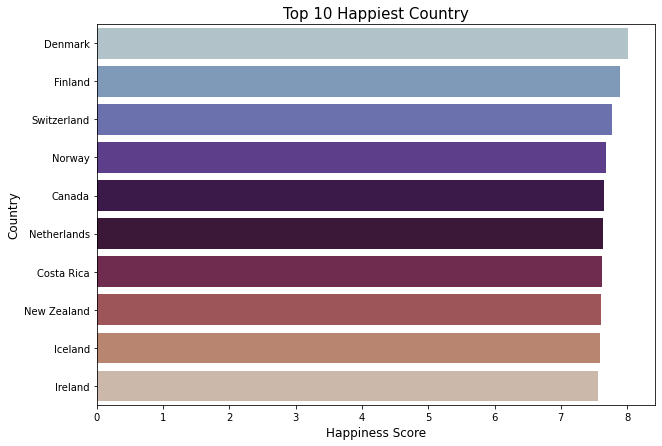

In [114]:
plt.figure(figsize=(10,7))
sns.barplot(y=happy_top10['Country name'], x=happy_top10['Life Ladder'], palette='twilight', orient='h')
plt.title('Top 10 Happiest Country', fontsize=15)
plt.xlabel('Happiness Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

# **Turkey from 2006 to 2020**

In [115]:
Turkey=data[data['Country name']=='Turkey']
Turkey_index= Turkey.set_index('year')
Tur = Turkey_index.drop(columns='Country name')
Tur.drop(index=2005, inplace=True)
Tur

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2007,5.623,9.903,0.792,63.32,0.459,-0.178,0.800,0.651,0.395
2008,5.118,9.899,0.645,63.68,0.415,-0.189,0.785,0.614,0.345
2009,5.213,9.838,0.755,64.04,0.456,-0.227,0.853,0.598,0.316
2010,5.490,9.906,0.795,64.40,0.515,-0.187,0.811,0.652,0.327
2011,5.272,9.996,0.692,64.64,0.446,-0.242,0.649,0.621,0.380
2012,5.309,10.026,0.739,64.88,0.471,-0.216,0.702,0.645,0.335
2013,4.888,10.091,0.795,65.12,0.541,-0.229,0.698,0.635,0.392
2014,5.580,10.124,0.863,65.36,0.649,-0.024,0.764,0.483,0.377
2015,5.514,10.166,0.851,65.60,0.653,-0.016,0.806,0.460,0.382


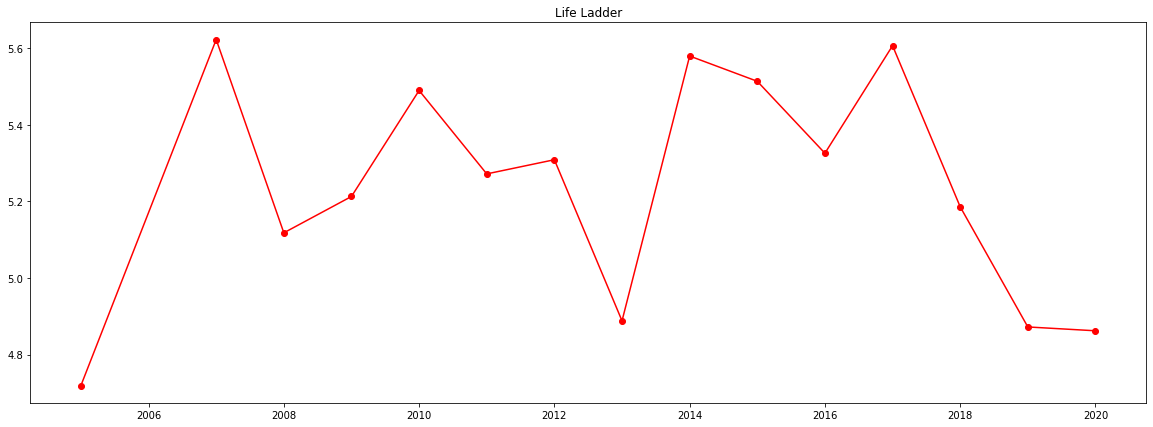

In [116]:
plt.figure(figsize=(20,7))
plt.plot(Turkey['year'],Turkey['Life Ladder'],marker='o', color='r')
plt.title("Life Ladder")
plt.show()

* There is a huge increase in life ladder from 2005 to 2007.
* There is a large decrease in life ladder between 2017-2019.


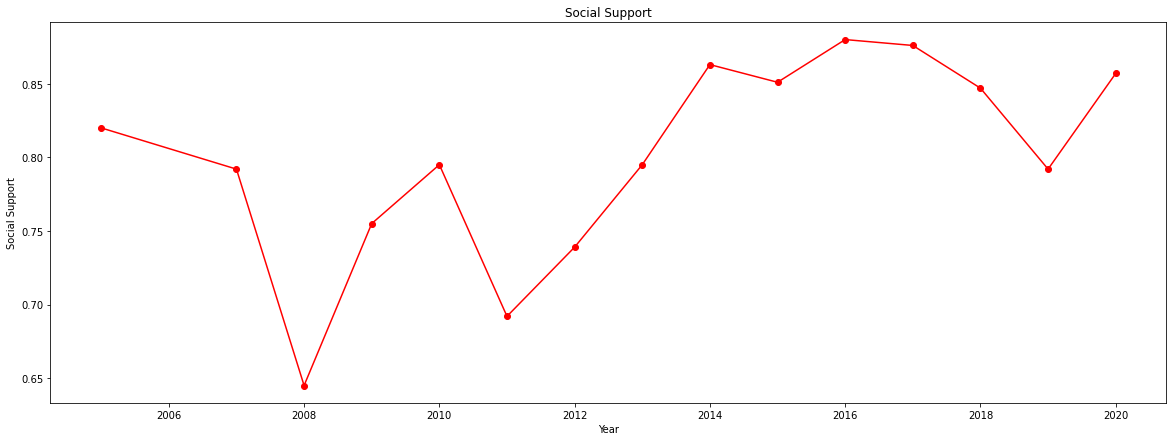

In [117]:
plt.figure(figsize=(20,7))
plt.plot(Turkey["year"], Turkey["Social support"],marker='o', color='r')
plt.xlabel("Year")
plt.ylabel("Social Support")
plt.title("Social Support")
plt.show()

* In general, social support increases.

# Turkey compared to other countries in its region in 2021

In [118]:
world = pd.read_csv('../input/world-happiness-report-2021/world-happiness-report-2021.csv')
world.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [119]:
middle_east=world[world['Regional indicator']=='Middle East and North Africa']
middle_east.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
11,Israel,Middle East and North Africa,7.157,0.034,7.224,7.090,10.575,0.939,73.503,0.800,0.031,0.753,2.43,1.376,1.074,0.788,0.509,0.208,0.119,3.083
21,Bahrain,Middle East and North Africa,6.647,0.068,6.779,6.514,10.669,0.862,69.495,0.925,0.089,0.722,2.43,1.409,0.899,0.662,0.661,0.246,0.139,2.631
24,United Arab Emirates,Middle East and North Africa,6.561,0.039,6.637,6.484,11.085,0.844,67.333,0.932,0.074,0.589,2.43,1.555,0.860,0.594,0.670,0.236,0.223,2.422
25,Saudi Arabia,Middle East and North Africa,6.494,0.056,6.604,6.384,10.743,0.891,66.603,0.877,-0.149,0.684,2.43,1.435,0.964,0.571,0.603,0.090,0.163,2.668
46,Kuwait,Middle East and North Africa,6.106,0.066,6.235,5.977,10.817,0.843,66.900,0.867,-0.104,0.736,2.43,1.461,0.857,0.580,0.591,0.120,0.130,2.368


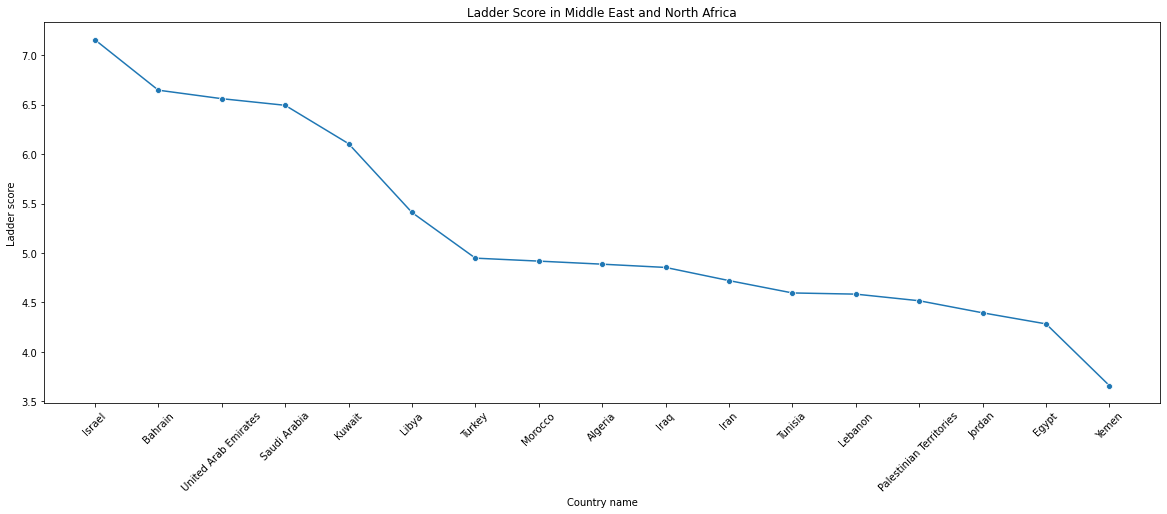

In [120]:
plt.figure(figsize=(20,7))
sns.lineplot(data=middle_east,x="Country name",y="Ladder score",marker='o')
plt.xticks(rotation=45)
plt.title("Ladder Score in Middle East and North Africa")
plt.show()

* There is a huge difference in life ladder score in Middle East countries.
* Israel's score is much more higher than Yemen's even though both of them are in the same region.

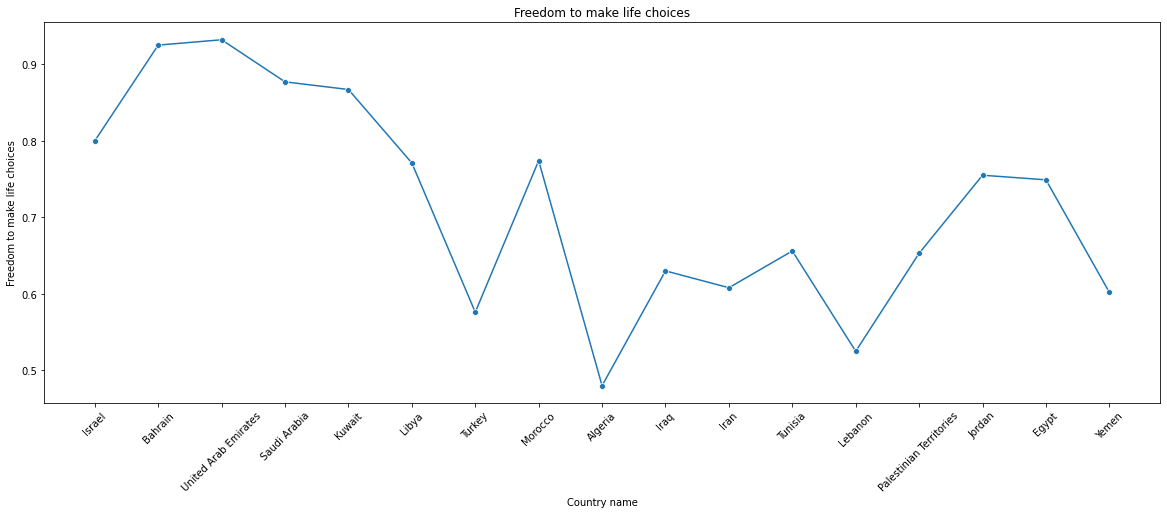

In [121]:
plt.figure(figsize=(20,7))
sns.lineplot(data=middle_east,x="Country name",y="Freedom to make life choices",marker='o')
plt.title("Freedom to make life choices")
plt.xticks(rotation=45)
plt.show()

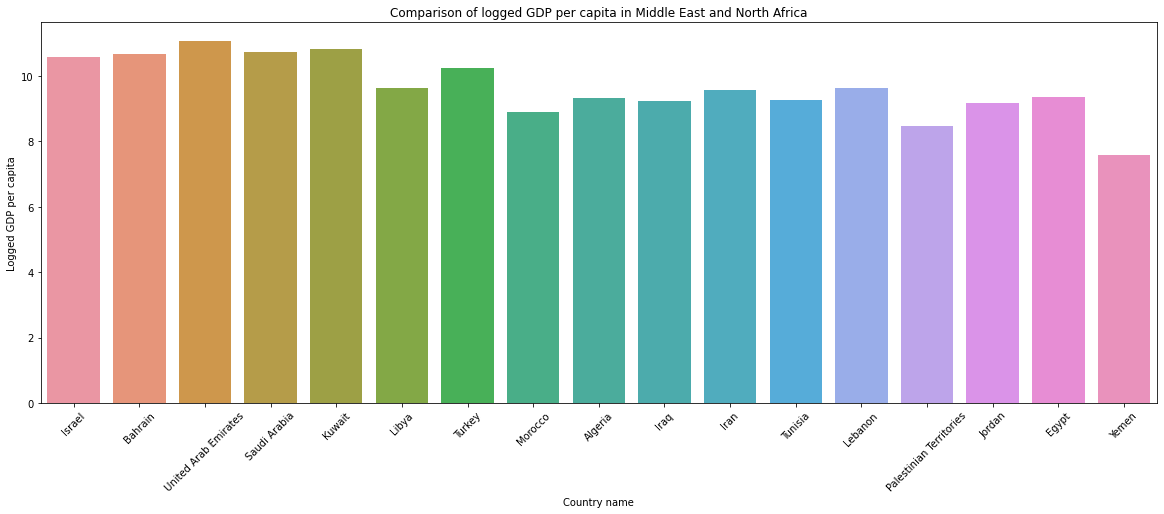

In [122]:
plt.figure(figsize=(20,7))
sns.barplot(data=middle_east,x="Country name",y="Logged GDP per capita")
plt.title("Comparison of logged GDP per capita in Middle East and North Africa")
plt.xticks(rotation=45)
plt.show()

# What makes people feel free to make life choices in Turkey?

In [123]:
Tur.head()

,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,,,,,,,,,
2007,5.623,9.903,0.792,63.32,0.459,-0.178,0.800,0.651,0.395
2008,5.118,9.899,0.645,63.68,0.415,-0.189,0.785,0.614,0.345
2009,5.213,9.838,0.755,64.04,0.456,-0.227,0.853,0.598,0.316
2010,5.490,9.906,0.795,64.40,0.515,-0.187,0.811,0.652,0.327
2011,5.272,9.996,0.692,64.64,0.446,-0.242,0.649,0.621,0.380


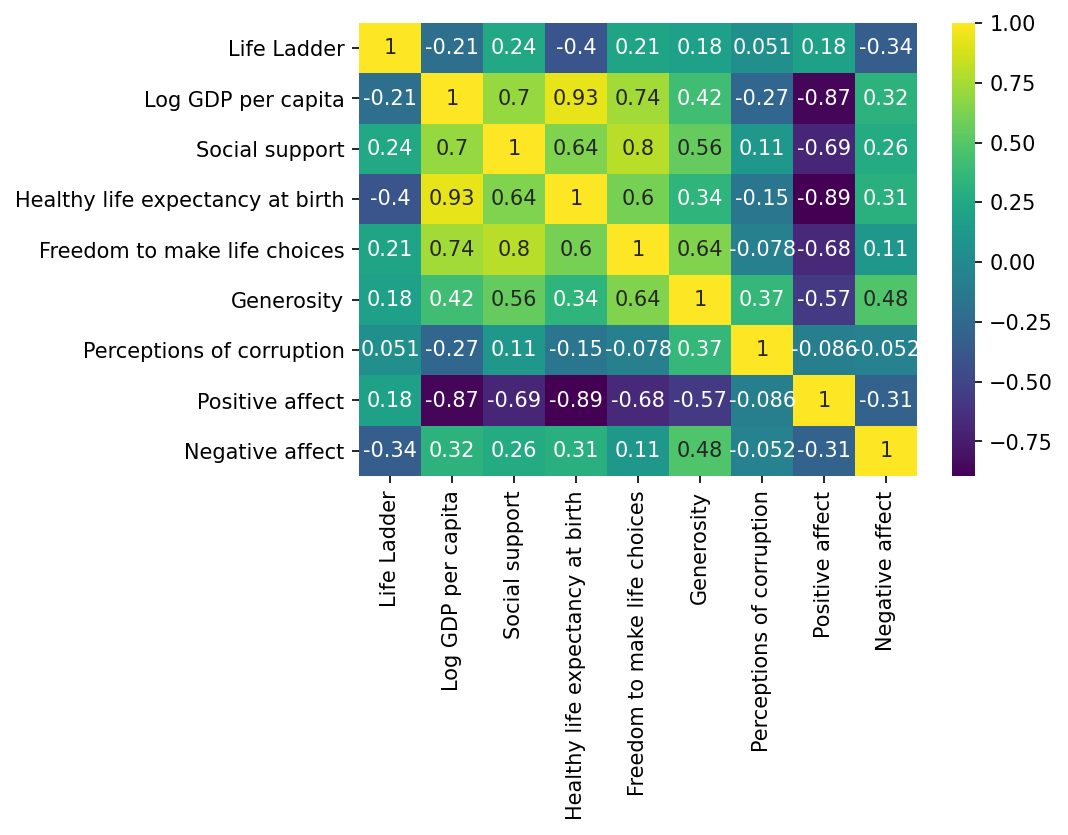

In [124]:
plt.figure(dpi=150)
sns.heatmap(Tur.iloc[:].corr(), cmap='viridis', annot=True)
plt.show()

* Freedom to make life choices has good level of correlation with Log GDP per capita, social support, generosity.


**let's compare Turkey and the rest of the world.**

In [125]:
data["View"] = np.where(data["Country name"]=="Turkey","Turkey", "World")
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,View
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,World
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,World
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,World
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,World
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,World


In [126]:
df_plt = data.groupby(["year", "View"], as_index=False).mean()
df_plt.head()

,year,View,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2005,Turkey,4.719000,9.809000,0.820000,62.600000,0.623000,NaN,0.877000,0.55700,NaN
1,2005,World,6.512692,10.130577,0.900385,67.176923,0.838125,0.256000,0.709167,0.75628,0.255769
2,2006,World,5.196899,9.044284,0.835809,60.147500,0.730477,0.006654,0.755747,0.71909,0.254614
3,2007,Turkey,5.623000,9.903000,0.792000,63.320000,0.459000,-0.178000,0.800000,0.65100,0.395000
4,2007,World,5.416248,9.165723,0.807929,61.285120,0.689620,0.016743,0.792052,0.70976,0.248782


In [127]:
data["View"] = np.where(data["Country name"]=="Turkey","Turkey", "World")
data.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,View
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,World
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,World
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,World
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,World
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,World


> 

> 

<AxesSubplot:xlabel='year', ylabel='Negative affect'>

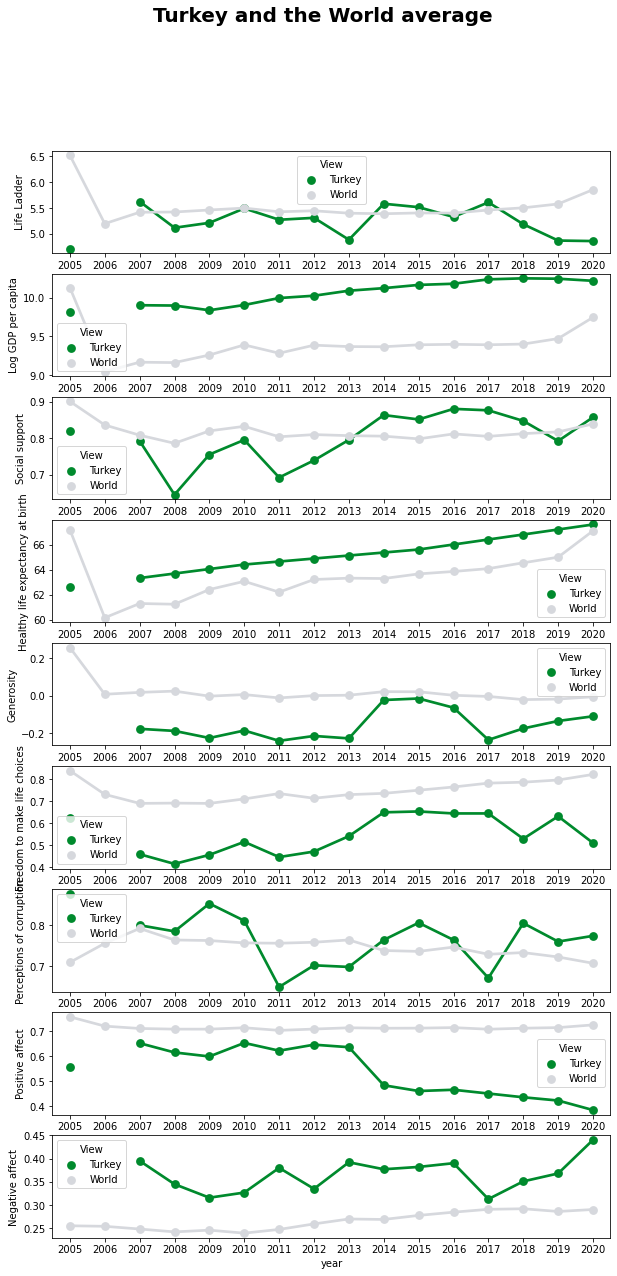

In [128]:
fig, axes = plt.subplots(nrows=9, figsize=(10, 20))

fig.suptitle("Turkey and the World average",fontweight="bold", fontsize=20)

palette = {c:"#008A2D" if c=="Turkey" else "#D6D8DD" for c in data["View"].unique()}


sns.pointplot(x="year", y="Life Ladder", data=df_plt, hue="View", palette=palette, ax=axes[0])
sns.pointplot(x="year", y="Log GDP per capita", data=df_plt, hue="View", palette=palette, ax=axes[1])
sns.pointplot(x="year", y="Social support", data=df_plt, hue="View", palette=palette, ax=axes[2])
sns.pointplot(x="year", y="Healthy life expectancy at birth", data=df_plt, hue="View", palette=palette, ax=axes[3])
sns.pointplot(x="year", y="Generosity", data=df_plt, hue="View", palette=palette, ax=axes[4])
sns.pointplot(x="year", y="Freedom to make life choices", data=df_plt, hue="View", palette=palette, ax=axes[5])
sns.pointplot(x="year", y="Perceptions of corruption", data=df_plt, hue="View", palette=palette, ax=axes[6])
sns.pointplot(x="year", y="Positive affect", data=df_plt, hue="View", palette=palette, ax=axes[7])
sns.pointplot(x="year", y="Negative affect", data=df_plt, hue="View", palette=palette, ax=axes[8])
